In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math
import random
import cmath
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Question 1: 

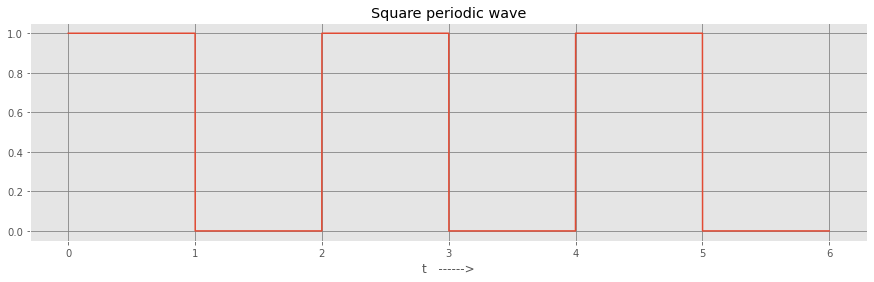

In [22]:
# Defining periodic square wave:

square = []
u = np.arange(0,6,0.001)
x = np.arange(0,2,0.001)
for k in range(3):
    for i in x+2*k:
        if ((0+2*k<=i<=1+2*k)):
            square.append(1)
        else:
            square.append(0)
fig = plt.figure(1,figsize=(15,4))

plt.plot(u,square)
plt.title("Square periodic wave")
plt.xlabel("t   ------>")
style.use("ggplot")
plt.grid(color="gray")
plt.show()

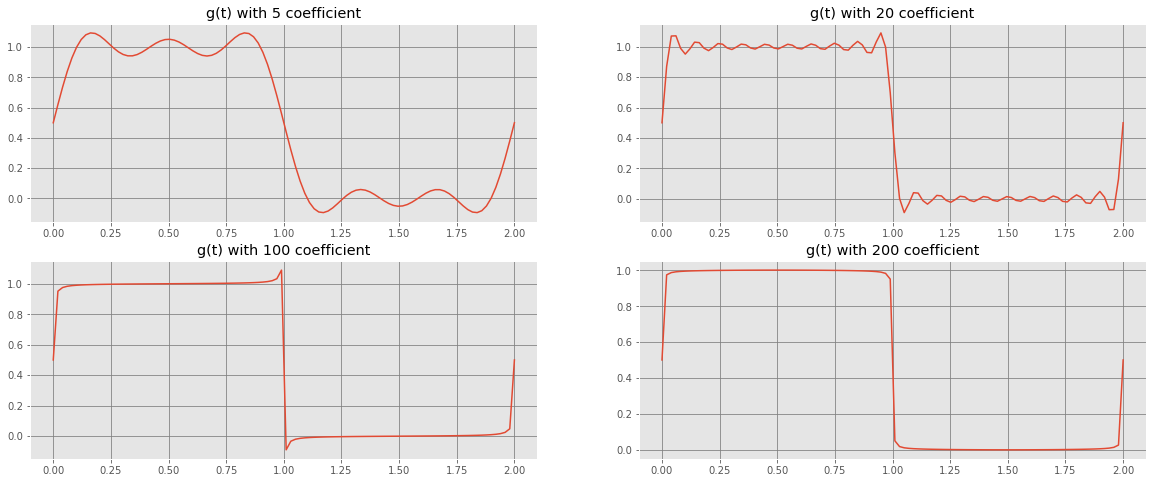

In [23]:
# Defining the fourier series coefficient:

A_o = 0.5
def A_n(n):
    t = np.linspace(0,2,100)
    An = ((np.sin(n*np.pi)) / (n*np.pi)) * (np.cos(n*np.pi*t))
    return An
def B_n(n):
    t = np.linspace(0,2,100)
    Bn = ((1-np.cos(n*np.pi)) / (n*np.pi)) * (np.sin(n*np.pi*t))
    return Bn
t = np.linspace(0,2,100)
s1 = 0
s2 = 0 
s3 = 0
s4 = 0

fig = plt.figure(1,figsize=(20,8))
for i in range(1,6):
    s1 =s1+A_n(i) + B_n(i)
plt.subplot(2,2,1)
plt.plot(t,s1+0.5)
style.use("ggplot")
plt.grid(color="gray")
plt.title("g(t) with 5 coefficient")


for i in range(1,21):
    s2 =s2+A_n(i) + B_n(i)
plt.subplot(2,2,2)
plt.plot(t,s2+0.5)
style.use("ggplot")
plt.grid(color="gray")
plt.title("g(t) with 20 coefficient")



for i in range(1,101):
    s3 =s3+A_n(i) + B_n(i)
plt.subplot(2,2,3)
plt.plot(t,s3+0.5)
style.use("ggplot")
plt.grid(color="gray")
plt.title("g(t) with 100 coefficient")


for i in range(1,201):
    s4 =s4+A_n(i) + B_n(i)
plt.subplot(2,2,4)
plt.plot(t,s4+0.5)
plt.title("g(t) with 200 coefficient")
style.use("ggplot")
plt.grid(color="gray")
plt.show()

In [24]:
"""
What happens to the Gibbs phenomenon when the number of terms becomes large?
"""

print("\n\nFor continuous periodic signals, a sufficiently large number of harmonics can be used to approximate the signal reasonably       well. For periodic signals with discontinuities, however, such as a periodic square wave, even a large number of harmonics will not be sufficient to reproduce the square wave exactly. This effect is known as Gibbs phenomenon and it manifests itself in the form of ripples of increasing frequency and an overshoot (as well as an undershoot) closer to the transitions of the square signal.")



For continuous periodic signals, a sufficiently large number of harmonics can be used to approximate the signal reasonably       well. For periodic signals with discontinuities, however, such as a periodic square wave, even a large number of harmonics will not be sufficient to reproduce the square wave exactly. This effect is known as Gibbs phenomenon and it manifests itself in the form of ripples of increasing frequency and an overshoot (as well as an undershoot) closer to the transitions of the square signal.


# Question2 :

In [25]:
# defining the given signal:

x_n = []
f = 30
t = np.arange(0,.99,0.01)
for i in t:
    xt = np.cos(2*np.pi*f*i)
    x_n.append(xt)

# Defining the function for calculation of DFT:
def DFT(x_n):
    N = len(x_n)-1
    dft = []
    for k in range(N):
        x = 0
        for n in range(N):
                a = x_n[n]*complex(np.cos(((2*np.pi)/N)*k*n),-np.sin(((2*np.pi)/N)*k*n))
                x = x+a                     
        dft.append(abs(x))
    return(dft)

print("The DFT of given sequence is =\n\n",DFT(x_n))


The DFT of given sequence is =

 [1.1180339887497937, 1.1192483306286127, 1.1229077394583724, 1.1290619364112504, 1.1377957331401793, 1.1492320824097233, 1.163536636355152, 1.1809241377446411, 1.201667123896769, 1.2261076372337645, 1.2546729439274913, 1.2878967149891143, 1.3264478073233403, 1.3711698371262944, 1.423136406726023, 1.4837295554838215, 1.5547535329593956, 1.6386038048274763, 1.7385251807398363, 1.8590190280732173, 2.006510574767215, 2.1904930282792106, 2.4255995445400003, 2.7356178822001103, 3.161966049263082, 3.7837260070671785, 4.773031501424962, 6.588926375226068, 11.002046144060659, 37.48953179597594, 24.319201867722256, 8.868332872850461, 5.303347978743153, 3.7192350507394614, 2.824079852319058, 2.248812680939083, 1.848098543072216, 1.5531610201058215, 1.3272930158128726, 1.1491803279373112, 1.0056730777361795, 0.8883057079230983, 0.7914845678733904, 0.7114849581670531, 0.645866787120815, 0.5931131739392482, 0.5523833715998958, 0.5233145475595943, 0.5058370374461267, 

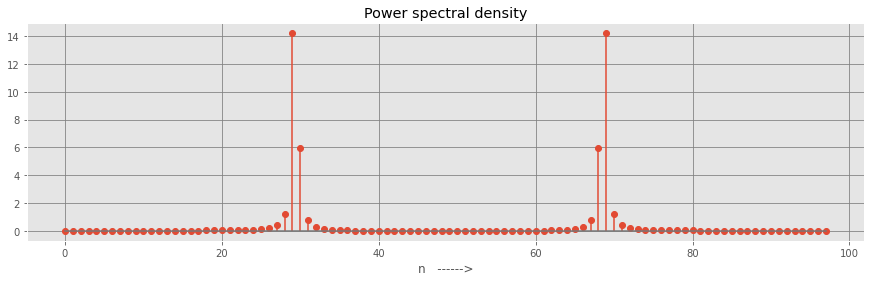

In [32]:
#Plotting the power spectral density:
dft = DFT(x_n)
psd = []
for i in range(98):
    s = (dft[i]**2)
    psd.append(s/99)
fig = plt.figure(1,figsize=(15,4))
plt.stem(psd,use_line_collection=True)
plt.title("Power spectral density")
plt.xlabel("n   ------>")
style.use("ggplot")
plt.grid(color="gray")
plt.show()


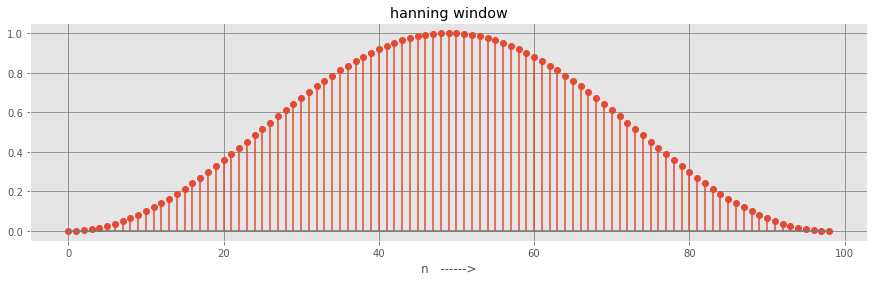

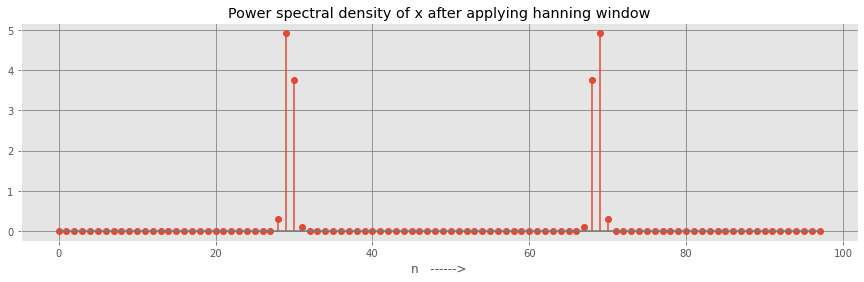

In [33]:
"""
(b) Using various window functions such as Hanning, Hamming, Bartlett etc. try to minimize the Spectral Leakage. 
Show the plots in each case.

"""

# Defining the hanning window:
t = np.arange(0,.99,0.01)
def hann(M):
    H = []
    for i in range(M):
        H.append(0.5-0.5*np.cos( (2*np.pi*i)/(M-1) ))
    return np.array(H)

fig = plt.figure(1,figsize=(15,4))
plt.stem(hann(99),use_line_collection=True)
plt.xlabel("n   ------>")
style.use("ggplot")
plt.grid(color="gray")
plt.title("hanning window")

x = x_n * hann(99)
dft_x = DFT(x)
psd_x = []
for i in range(len(dft_x)):
    s = (dft_x[i]**2)
    psd_x.append(s/99)
fig = plt.figure(2,figsize=(15,4))
plt.stem(psd_x,use_line_collection=True)
plt.title("Power spectral density of x after applying hanning window")
plt.xlabel("n   ------>")
style.use("ggplot")
plt.grid(color="gray")
plt.show()

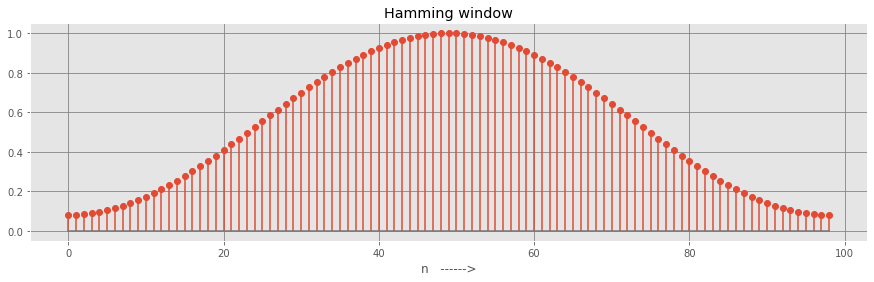

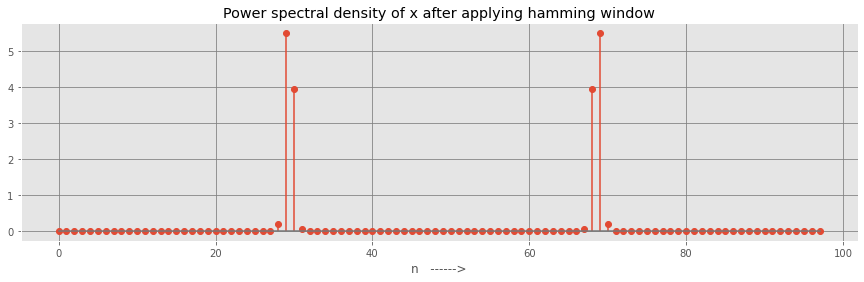

In [34]:
# Defining the hamming window:

def hamm(M):
    H=[]
    for i in range(M):
        H.append(0.54-0.46*np.cos( (2*np.pi*i)/(M-1) ))
    return np.array(H)

fig = plt.figure(1,figsize=(15,4))
plt.stem(hamm(99),use_line_collection=True)
plt.xlabel("n   ------>")
style.use("ggplot")
plt.grid(color="gray")
plt.title("Hamming window")
plt.show()

x = x_n * hamm(99)
dft_x = DFT(x)
psd_x = []
for i in range(len(dft_x)):
    s = (dft_x[i]**2)
    psd_x.append(s/99)
fig = plt.figure(2,figsize=(15,4))
plt.stem(psd_x,use_line_collection=True)
plt.title("Power spectral density of x after applying hamming window")
plt.xlabel("n   ------>")
style.use("ggplot")
plt.grid(color="gray")
plt.show()

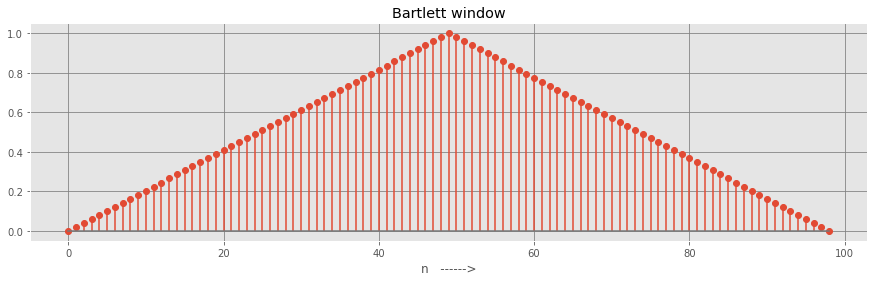

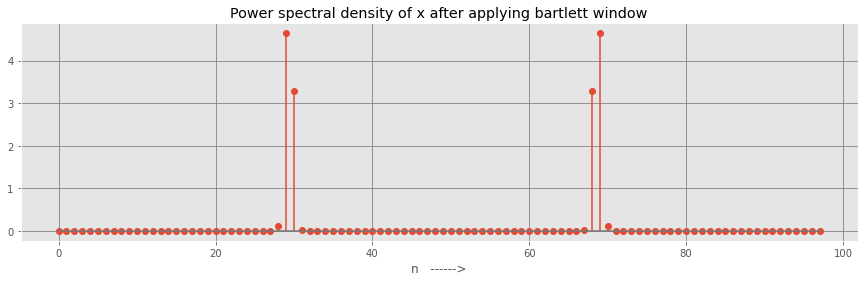

In [35]:
# Defining the bartlett window:

def bart(M):
    B=[]
    m=(M-1)/2
    for i in range(M):
        B.append( (1/m)*(m-abs(i-m)) )
    return np.array(B)
fig = plt.figure(1,figsize=(15,4))
plt.stem(bart(99),use_line_collection=True)
plt.xlabel("n   ------>")
style.use("ggplot")
plt.grid(color="gray")
plt.title("Bartlett window")

x = x_n * bart(99)
dft_x = DFT(x)
psd_x = []
for i in range(len(dft_x)):
    s = (dft_x[i]**2)
    psd_x.append(s/99)
fig = plt.figure(2,figsize=(15,4))
plt.stem(psd_x,use_line_collection=True)
plt.title("Power spectral density of x after applying bartlett window")
plt.xlabel("n   ------>")
style.use("ggplot")
plt.grid(color="gray")
plt.show()

#  Question 3:

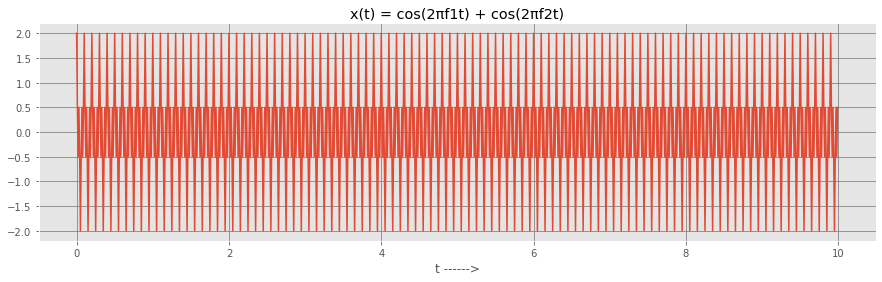

In [36]:
# signal x(t) = cos(2πf1t) + cos(2πf2t) :
f1 = 10
f2 = 30
t = np.arange(0,10,0.01)
xt = []
for i in t:
    u = np.cos(2*np.pi*f1*i) + np.cos(2*np.pi*f2*i)
    xt.append(u)
    
fig = plt.figure(1,figsize=(15,4))
plt.plot(t,xt)
plt.title("x(t) = cos(2πf1t) + cos(2πf2t)")
plt.xlabel("t ------>")
style.use("ggplot")
plt.grid(color="gray")
plt.show()

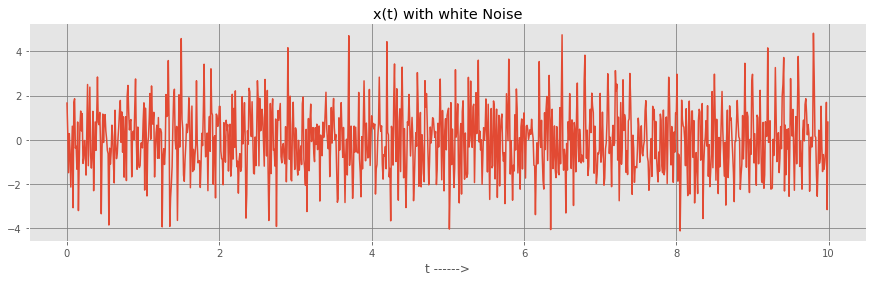

In [37]:
# Noisy version of x(t):

mean = 0
std = 1
N = 1000
white_noise = np.random.normal(mean, std, N)
y=xt+white_noise

fig = plt.figure(1,figsize=(15,4))
plt.plot(t,y)
plt.title("x(t) with white Noise")
style.use("ggplot")
plt.grid(color="gray")
plt.xlabel("t ------>")
plt.show()

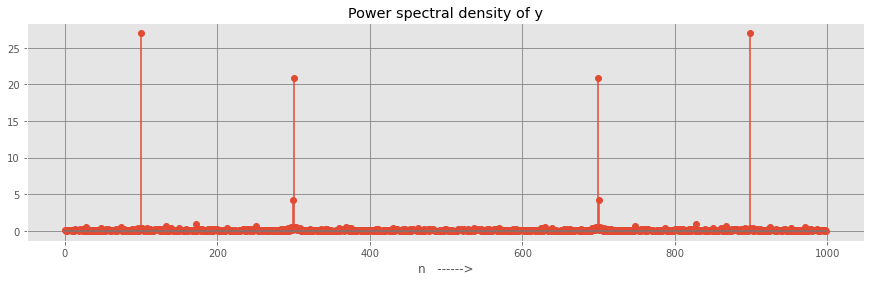

In [38]:
# Find the power spectral density of y(t) and show a labelled plot.:

psd_y = []
dft_y = DFT(y)
for i in range(999):
    s = (dft_y[i]**2)
    psd_y.append(s/10000)
fig = plt.figure(1,figsize=(15,4))
plt.stem(psd_y,use_line_collection=True)
plt.title("Power spectral density of y")
style.use("ggplot")
plt.grid(color="gray")
plt.xlabel("n   ------>")
plt.show()

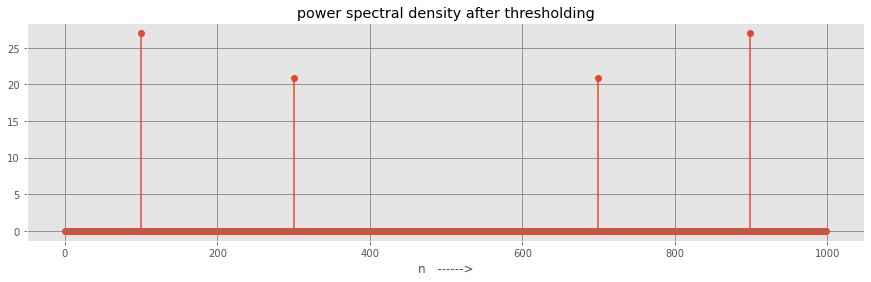

In [39]:
# Recover x(t) from y(t) using the threshold. Show the necessary plots:
filter = []
threshold = 5
for i in range(len(psd_y)):
    if psd_y[i] >threshold:
            filter.append(psd_y[i])
    else:
        filter.append(0)
fig = plt.figure(1,figsize=(15,4))
plt.stem(filter,use_line_collection=True)
plt.title("power spectral density after thresholding")
style.use("ggplot")
plt.grid(color="gray")
plt.xlabel("n   ------>")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


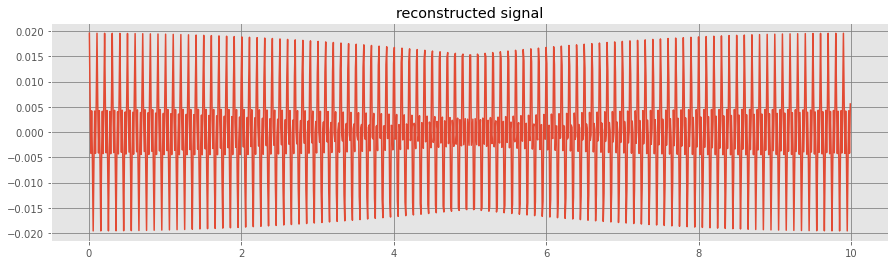

In [40]:
idft_filter = []
N = len(filter)
t = np.arange(0.01,10,0.01)

for n in range(N):
    x = 0
    for k in range(N):
            a = np.sqrt(filter[k])*complex(np.cos(((2*np.pi)/N)*n*k),np.sin(((2*np.pi)/N)*k*n))
            x = x+a                     
    idft_filter.append(x/N)
fig = plt.figure(1,figsize=(15,4))
plt.plot(t,idft_filter)
style.use("ggplot")
plt.grid(color="gray")
plt.title("reconstructed signal")
plt.show()
